**Задача:** Провести анализ данных  определить причину оттока клиентов банка. 

In [1]:
# Подгружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import nbformat 
import seaborn as sns
from IPython.display import Image

# Подгружаем данные
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Информация о содержащихся в таблице столбцах:**

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [2]:
# Избавляемся от лишних данных 
churn_data.drop(['RowNumber'], axis=1,inplace=True)

Для начала определим **соотношение ушедших и лояльных клиентов**

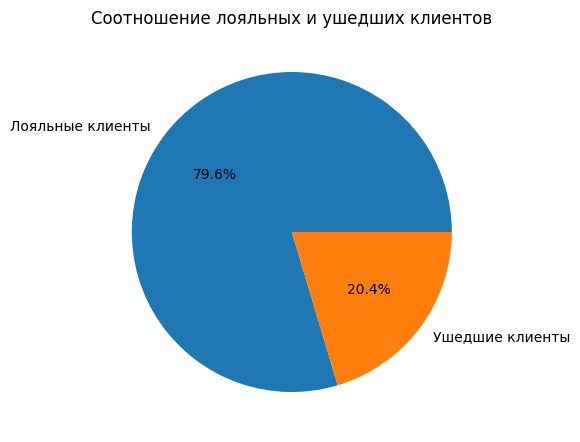

In [3]:
#Определим количество ушедших и лояльных клиентов
Exited_data = churn_data['Exited'].value_counts()

#Построим круговую диаграмму на основе полученных данных с помощью Mathplotlib
fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение лояльных и ушедших клиентов')

axes.pie(
    Exited_data.values,
    labels=['Лояльные клиенты','Ушедшие клиенты'],
    autopct='%.1f%%',
        );

На круговой диаграмме прекрасно видно, что практически 80 % клиентов лояльны по отношению к банку. И лишь пятая часть из пришедших в банк клиентов отказались или хотят отказаться от сотрудничества с банком. 

Проанализируем **распределение денежных средств клиентов**, у которых на счету больше 2 500 долларов.

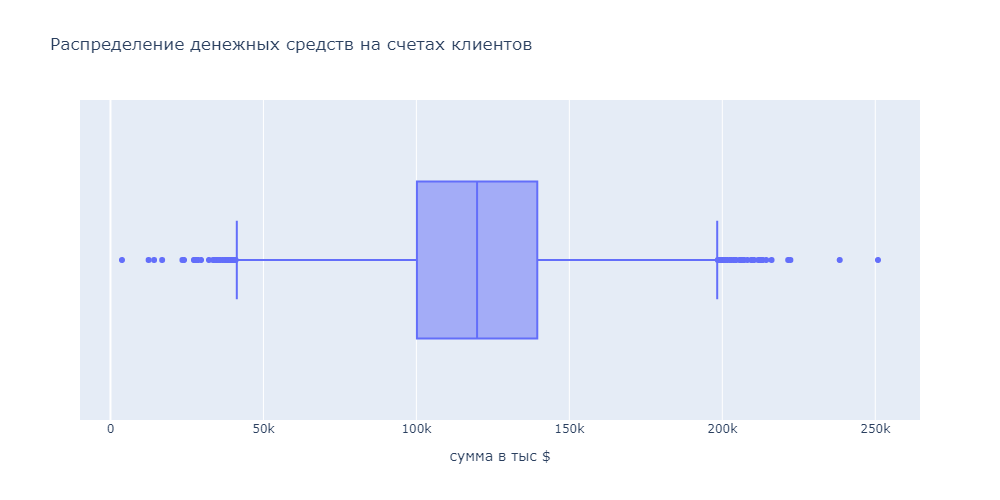

In [4]:
#Сортируем данные, отбирая клиентов, у которых на счету более 2500 долларов
Balance_data = churn_data[churn_data['Balance'] > 2500]

#Строим коробочную диаграмму с помощью Plotly
fig = px.box(
    data_frame=Balance_data, 
    x='Balance', 
    height=500, 
    width=1000, 
    labels = {'Balance':'сумма в тыс $'},
    title='Распределение денежных средств на счетах клиентов' 
)
fig.show("png")

Проанализировав коробочную диаграмму основанную на данных о клиентах, у которых на счетах лежит больше 2500 долларов, можно сделать следующие выводы: 
1. в среднем на счетах у таких клиентов находится сумма чуть менее 120 тыс долларов;
2. при этом у половины клиентов сумма на счетах варьируется от 100 до 140 тыс долларов;
3. но стоит отметить значительное количество выбросов, что говорит о неверно подобранном дипазоне для анализа данных. Возможно, следует уточнить его и провести повторный анализ. 

Давайте оценим **распределение денежных средств на счетах клиентов в разрезе оттока.**

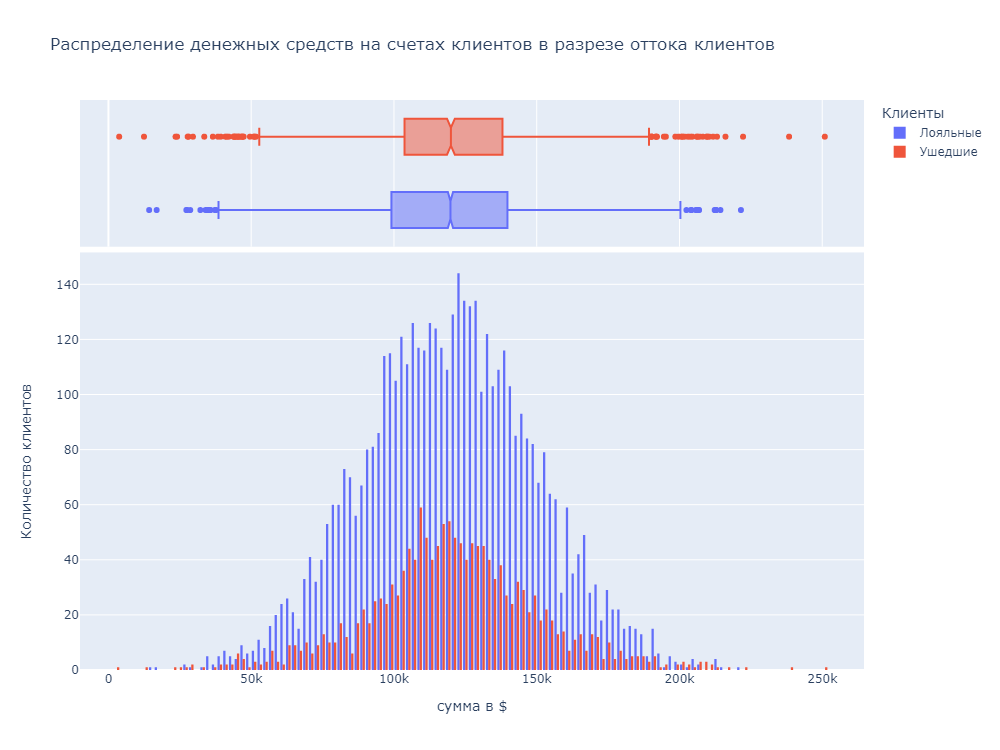

In [5]:
#Строим гистограмму с помощью Plotly
fig = px.histogram(
    data_frame=Balance_data, 
    x='Balance', 
    color = 'Exited',
    height = 750, 
    width = 1000, 
    labels = {'Balance':'сумма в $', 'Exited':'Клиенты', 'count':'Количество клиентов'},
    title ='Распределение денежных средств на счетах клиентов в разрезе оттока клиентов',
    marginal = 'box',
    barmode  = 'group'
)
#Поправим подписи на осях и в легенде для повышения удобочитаемости
fig.update_layout(yaxis_title_text='Количество клиентов')
name_legend = {'0':'Лояльные', '1':'Ушедшие'}
fig.for_each_trace(lambda t: t.update(name = name_legend[t.name]))

fig.show("png")

На графике прекрасно видно, что и у лояльних и ушедших клиентов, на счетах которых находится более 2500 долларов, примерно одинаково распределены средства. В среднем это от 100 до 150 тыс долларов. Общий дипазон размещения денежных стредств на счетах лояльных клиентов чуть шире и составляет от 37 тыс. до 200 тыс. долларов. 
Но стоит отметить, что три клиента с самыми большими суммами на счетах относятся к ушедшим клиентам. 

Проанализируем **возраст лояльных и ушедших клиентов.**


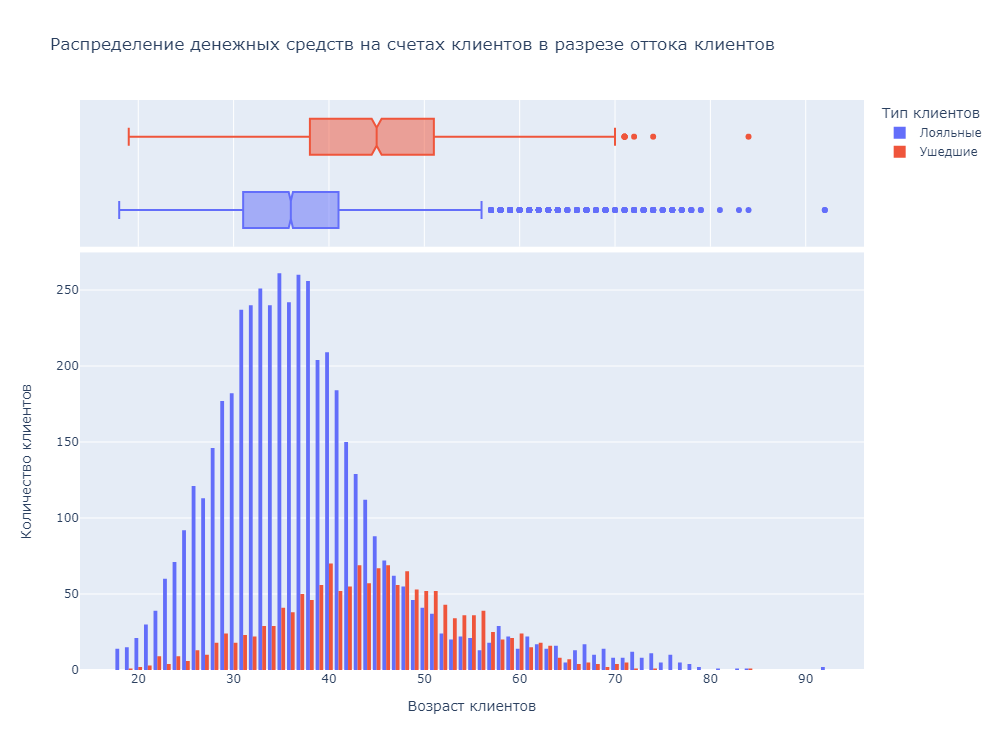

In [6]:
#Строим гистограмму с помощью Plotly, в качестве значений выводим количество строк

fig = px.histogram(
    data_frame=Balance_data, 
    x ='Age', 
    color = 'Exited',
    height = 750, 
    width = 1000, 
    labels = {'Age':'Возраст клиентов', 'Exited':'Тип клиентов'},
    title ='Распределение денежных средств на счетах клиентов в разрезе оттока клиентов',
    marginal = 'box',
    barmode  = 'group',
)

#Поправим подписи на осях и в легенде для повышения удобочитаемости
fig.update_layout(yaxis_title_text='Количество клиентов')
name_legend = {'0':'Лояльные', '1':'Ушедшие'}
fig.for_each_trace(lambda t: t.update(name = name_legend[t.name]))

fig.show("png")

Средний возраст ушедших клиентов 45 лет. А половина из них в возрасте от 37 до 51 года. При этом средний возраст лояльных клиентов 36, а половина клиентов в возрасте от 31 до 41 года. Это говорит о том, что банку больше удаётся наладить взаимототношения с клиентами более молодого возраста. Это подтверждает и то, что доля лояльных клиентов до 30 значительно выше, чем у ушедших. 
Стоит отметить, что среди клиентов старше 70 (хотя их в целом не много), больше лояльных клиентов. Но это скорее связано с не желанием что-то менять у людей более старшего возраста. 

Проанализируем **взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты** в разрезе лояльности клиентов. 

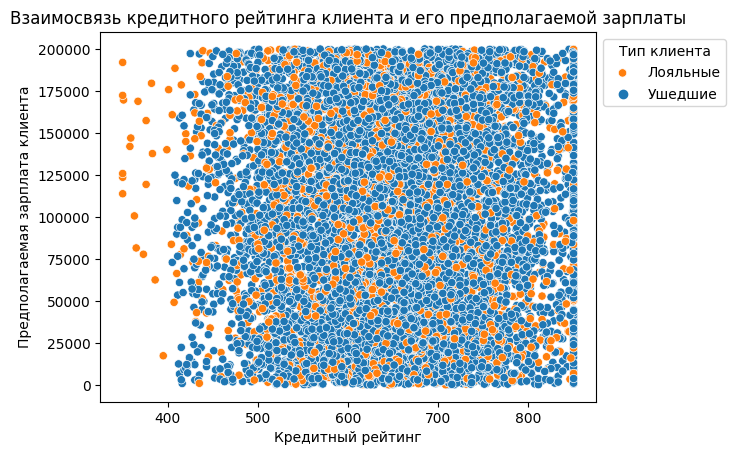

In [7]:
#Строим диграмму рассеяния с помощью Seaborn
scatter = sns.scatterplot(
    x ='CreditScore', 
    y = 'EstimatedSalary',
    hue='Exited',
    data=churn_data,
);

#Поправим подписи на осях и в легенде для повышения удобочитаемости
scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');
scatter.set_xlabel('Кредитный рейтинг');
scatter.set_ylabel('Предполагаемая зарплата клиента');
scatter.legend( ['Лояльные','Ушедшие'], bbox_to_anchor=(1, 1), title='Тип клиента');


На диаграмме видно, что нет никакой связи между кредитным рейтингом и предполагаемой зарплатой клиента. Встречаются как клиенты с высоким кредитным рейтингом и высокой зарплатой, так и с низким рейтингом и низкой зарплатой. 


Проанализируем **процент ушедших клиентов по гендерному признаку.**

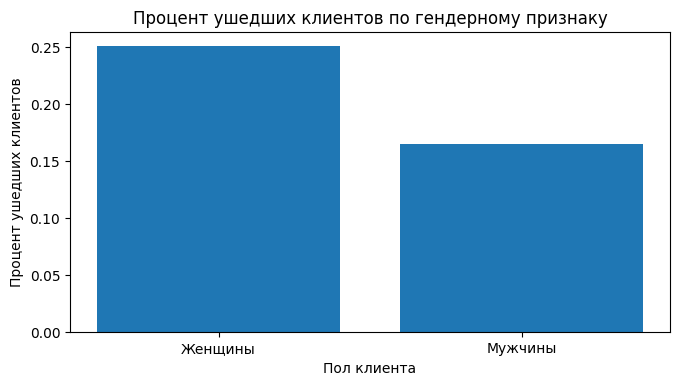

In [8]:
#Выберем необходимые данные из таблицы
Gender_data = churn_data.groupby('Gender')['Exited'].mean()

#Построим столбчатую диаграмму на основе полученных данных с помощью Mathplotlib
fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Процент ушедших клиентов по гендерному признаку')
axes.set_ylabel('Процент ушедших клиентов')
axes.set_xlabel('Пол клиента')
axes.set_xticks([0,1])
axes.xaxis.set_ticklabels(['Женщины','Мужчины'])
axes.bar(
    height=Gender_data.values,
    x=Gender_data.index,
    );

На диаграмме отчётливо видно, что среди клиентов, отказавшихся от услуг банка, женщин больше, чем мужчин. 

Проанализируем как **отток клиентов зависит от числа приобретённых у банка услуг.**

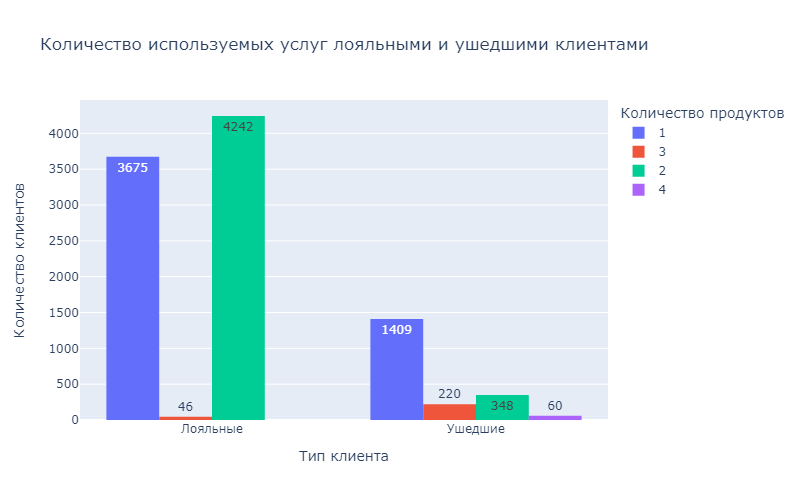

In [9]:
#Построим многоуровневую столбчатую диаграмму
fig_NoF = px.histogram(churn_data, 
        x="Exited", 
        y="NumOfProducts", 
        histfunc='count', 
        color="NumOfProducts", 
        barmode='group',
        text_auto=True,
        width=800,
        title='Количество используемых услуг лояльными и ушедшими клиентами', 
        labels=dict(NumOfProducts='Количество продуктов', Exited='Тип клиента')
        )
#Переименуем ось Y и значения оси X
fig_NoF.update_layout(yaxis_title_text='Количество клиентов')
fig_NoF.update_xaxes(tickmode="array", ticktext=['Лояльные','Ушедшие'], tickvals=[0,1])

fig_NoF.show("png")

По полученным данным можно сделать вывод, что нушедшие клиенты использовали большее количество услуг, а, следовательно, больше контактировали с сотрудниками банка. Причём лояльных клиентов, у которых приобретено 4 услуги вообще нет. Так же хорошо заметно, что доля ушедших клиентов среди тех, кто приобрёл 2 услуги значительно ниже, чем среди тех, кто приобрёл 1.

Проанализируем, как **влияет ли наличие статуса активного клиента на отток клиентов.**

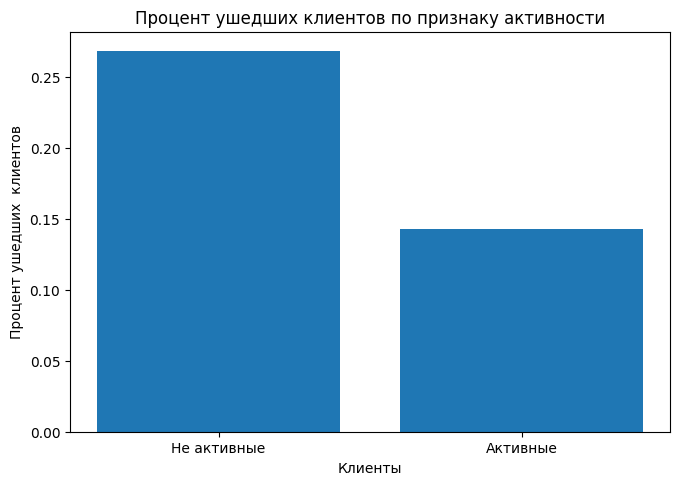

In [10]:
AM_data = churn_data.groupby('IsActiveMember')['Exited'].mean()
AM_data

#Построим столбчатую диаграмму на основе полученных данных с помощью Mathplotlib
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Процент ушедших клиентов по признаку активности')
axes.set_ylabel('Процент ушедших  клиентов')
axes.set_xlabel('Клиенты')
axes.set_xticks([0,1])
axes.xaxis.set_ticklabels(['Не активные','Активные'])
axes.bar(
    height=AM_data.values,
    x=AM_data.index,
    );

На графике видно, что больше четверти неактивных клиентов отказались от услуг банка. Среди активных клиентов банка их 15 %. 

Проанализируем **отток клиентов по странам.**

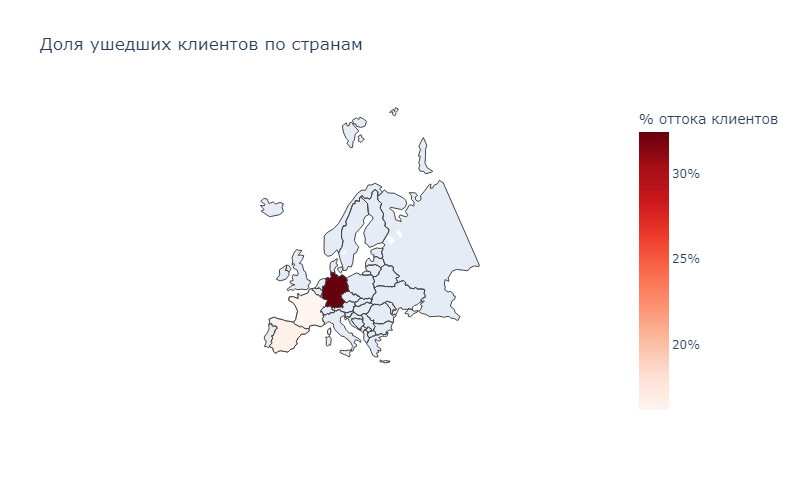

In [11]:
#Сгруппируем данные по странам и расчитаем % оттока клиентов
Geo_data = churn_data.groupby(['Geography'])['Exited'].mean()

#Построим тепловую карту на основе карты Европы
fig_map = px.choropleth(
    data_frame=Geo_data,
    locations=Geo_data.index, 
    locationmode = "country names", 
    color=Geo_data.values,
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500,
    color_continuous_scale='Reds',
#    labels={'Exited':'Тип клиентов'},
    scope="europe"       
)

fig_map.update_layout(coloraxis_colorbar=dict(
    title="% оттока клиентов",
    tickvals=[0.2,0.25,0.3],
    ticktext=["20%", "25%", "30%"]))

fig_map.show('png')

На представленной карте видно, что в Германии наблюдается значительный отток клиентов. Если это не связано с преобразованием структуры банка (например, закрытием филиала), то на это стоит обратить пристальное внимание и разработать предложения по привлечению и удержанию клиентов. 

Проанализируем **клиенты с каким кредитным рейтингом уходят чаще всего в разрезе количества лет работы с банком.**

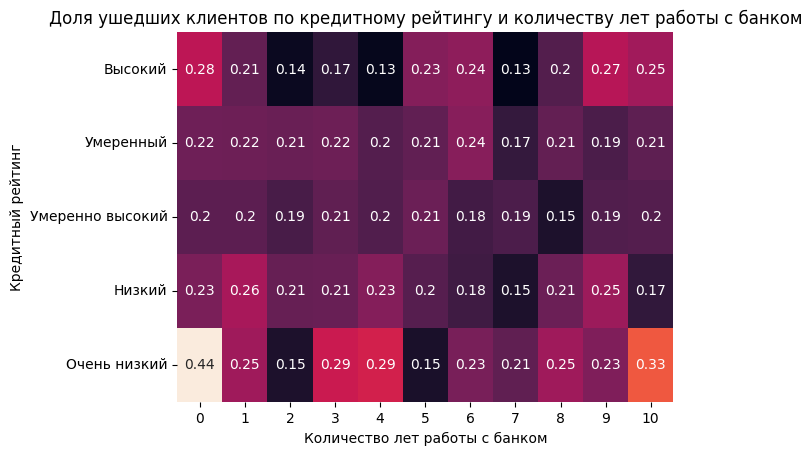

In [12]:
#Опишем функцию, изменяющую числовой признак на категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


#Добавим в таблицу категориальный признак CreditScoreCat на основе числового признака CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

#Соберём данные в сводную таблицу 
#и рассчитаем долю ушедших клиентов по кредитному рейтингу и количеству лет работы с банком
CreditScore_data = churn_data.pivot_table(values='Exited',
                                        index='CreditScoreCat',
                                        columns='Tenure',
                                        aggfunc='mean')


# Построим тепловую карту c помощью Seaborn
heatmap = sns.heatmap(CreditScore_data,
            annot=True, 
            cbar = False
);
heatmap.set_title('Доля ушедших клиентов по кредитному рейтингу и количеству лет работы с банком');
heatmap.set_xlabel('Количество лет работы с банком');
heatmap.set_ylabel('Кредитный рейтинг');
heatmap.yaxis.set_tick_params(rotation = 0)
heatmap.yaxis.set_ticklabels(['Высокий','Умеренный','Умеренно высокий','Низкий','Очень низкий']);

На представленном графике видно, что больше всего ушедших клиентов среди тех, кто имеет очень низкий кредитный рейтинг и только начал обслуживаться в банке, а так же клиенты, сотрудничающие с банком три-четыре года и больше 10 лет. 
Так же стоит обратить внимание на клиентов с высоким кредитным рейтингом, которые начали обслуживаться в банке и обслуживаются в нём больше 9 лет. На текущий момент это самые уязвимые категории. Необходимо проработать план мероприятий по удержанию таких клиентов. 
Самыми лояльными клиентами являются те, кто проработал с банком два - четыре года и имеет высокий кредитный рейтинг, а также те, у кого очень низкий кредитный рейтинг, но они являются клиентами банка два и пять лет. 